**Assignment 1**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 6-12-2023
```


**1. Describe in Function in YOUR OWN WORDS**

**tf.keras.layers.Conv2D**

```
Description: The Conv2D layer is a key element in image-processing neural networks, creating a convolutional kernel
to convolve with input, producing an output tensor.

Usage: In the model, two Conv2D layers are added sequentially in different layers. The first has 32 filters
with a 3x3 kernel and ReLU activation, expecting grayscale images of 28x28 pixels. The second adds 64 filters
with a 3x3 kernel and ReLU activation, assuming input shape from the preceding layer. These layers are pivotal
for extracting hierarchical features, enhancing the model's pattern recognition capabilities in the input data.

Options used:

filters: Integer, the dimensionality of the output space (number of filters).

kernel_size: An integer or tuple specifying the height and width of the 2D convolution window.

activation: Activation function to apply. ReLU is applied here.

input_shape: Shape of the input data, typically required for the first layer.

```



**tf.keras.layers.MaxPooling2D**

```
Description: The MaxPooling2D layer performs spatial downsampling by selecting the maximum value within a defined
window (specified by pool_size) for each channel of the input. This window shifts along each dimension according
to the specified strides.

Usage: In the given scenario, two MaxPooling2D layers are included in the model, both with
a pool size of (2, 2). This operation aids in capturing crucial features through spatial reduction,
contributing to the model's overall effectiveness in processing input data.

Options used:

pool_size: Tuple of two integers, specifying the size of the pooling window.
```


**tf.keras.layers.Dropout**

```
Description: The Dropout layer introduces randomness during training by randomly setting a fraction of input units to zero,
determined by the specified rate.

Usage: This stochastic process, applied thrice in the provided scenario with a dropout rate of 0.25, is a
regularization technique designed to prevent overfitting. Inputs that are not set to zero are scaled by a factor
to maintain the overall sum, promoting a more generalized and resilient neural network.

Options used:

rate: Float between 0 and 1, indicating the fraction of input units to drop.
```

**tf.keras.layers.Flatten**

```
Description:The Flatten layer is applied to the input data, reshaping it from a multidimensional tensor into a
one-dimensional vector. Crucially, this transformation does not impact the batch size. The inclusion of this layer
is instrumental in transitioning the data flow from convolutional layers to fully connected layers within the
neural network architecture.

Usage:The Flatten layer reshapes the input data from a multidimensional tensor (5x5x64) into a one-dimensional
vector (1600).
```




**tf.keras.layers.Dense**

```
Description: The Dense layer conducts a linear operation, defined as output = activation(dot(input, kernel) + bias).
It applies an element-wise activation function to the result. The layer incorporates a weights matrix ('kernel')
and, if applicable, a bias vector ('bias').

Usage: In the context of the provided code, two Dense layers are added to the model. The first has 128 units
and employs the ReLU activation function, while the second has 10 units and utilizes the softmax activation
function. These layers contribute significantly to capturing intricate patterns and generating output suitable
for classification tasks.

Options used:

units: Positive integer, dimensionality of the output space

activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear"
activation: a(x) = x).
```

**2. Setup and Load the MNIST Dataset**

**Import the necessary libraries from TensorFlow and Keras.**

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Load the MNIST dataset and split it into training and testing sets.**

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

**Normalize the pixel values of the images to the range [0, 1].**

In [20]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [21]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [22]:
x_train /= 255
x_val /= 255
x_test /= 255

**Convert the class vectors to binary class matrices (one-hot encoding).**

In [23]:
# convert y_train, y_val and y_test to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

**3. Build the CNN Model**

**Model Architecture**

In [10]:
model = Sequential()
# add a convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# add a dropout layer
model.add(Dropout(0.25))
# add a convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# add a dropout layer
model.add(Dropout(0.25))
# add a flatten layer
model.add(Flatten())
# add a dense layer
model.add(Dense(128, activation='relu'))
# add a dropout layer
model.add(Dropout(0.5))
# add a dense layer
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

**Compilation**

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

**4. Train and Test the Model**

**Train the model on the MNIST training set. Choose an appropriate batch size and number of epochs.**

In [13]:
history = model.fit(x_train, y_train, batch_size=64, epochs=60, verbose=1, validation_data=(x_val, y_val))

Epoch 1/60
629/629 [==============================] - 10s 8ms/step - loss: 0.3651 - accuracy: 0.8839 - val_loss: 0.0962 - val_accuracy: 0.9710
Epoch 2/60
629/629 [==============================] - 4s 6ms/step - loss: 0.1308 - accuracy: 0.9608 - val_loss: 0.0621 - val_accuracy: 0.9810
Epoch 3/60
629/629 [==============================] - 4s 6ms/step - loss: 0.0980 - accuracy: 0.9704 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 4/60
629/629 [==============================] - 4s 7ms/step - loss: 0.0852 - accuracy: 0.9747 - val_loss: 0.0448 - val_accuracy: 0.9860
Epoch 5/60
629/629 [==============================] - 3s 6ms/step - loss: 0.0715 - accuracy: 0.9784 - val_loss: 0.0436 - val_accuracy: 0.9874
Epoch 6/60
629/629 [==============================] - 3s 5ms/step - loss: 0.0666 - accuracy: 0.9793 - val_loss: 0.0407 - val_accuracy: 0.9871
Epoch 7/60
629/629 [==============================] - 3s 5ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0388 - val_accuracy: 0.9885
Epoch

**Evaluate the model on the MNIST test set and report the accuracy.**

In [14]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
# print the score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026968026533722878
Test accuracy: 0.9937000274658203


**Save the training history for later analysis.**

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**5. Analysis and Reporting**

**Plot the training and validation accuracy and loss over epochs.**

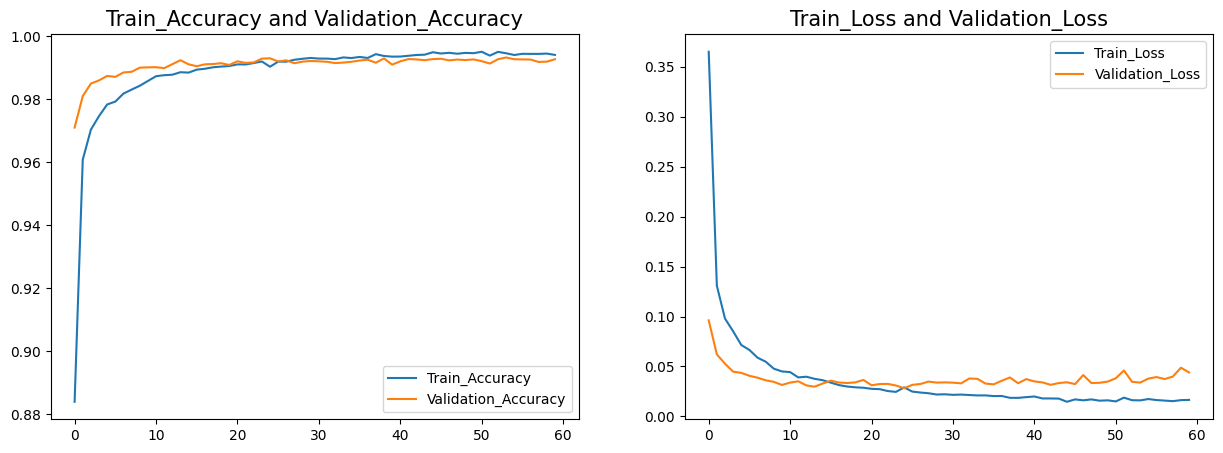

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train_Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train_Loss')
plt.plot(history.history['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()
plt.show()

**Discuss any signs of overfitting or underfitting and suggest possible solutions.**

```

1.   Overfitting Sign: A subtle indication of overfitting surfaces at Epoch 23 as the
validation accuracy starts declining while the training accuracy continues to rise.

2.   Underfitting: No evident underfitting is observed, where the model is too simple
 to capture data patterns.

Possible Solutions:

1. Early Stopping: Implement early stopping based on validation loss to halt training
when overfitting signs emerge.

```





**Provide a brief summary of your findings and any insights gained from this assignment.**

```
Brief Summary and Insights:
1. High accuracy on training and validation indicates effective learning.
2. Slight gap between training and validation losses is observed, suggesting potential
overfitting.
3. Learning curves show a smooth progression, indicating stable training.
```

